In [1]:
import torch
import util
import module_nn
import numpy as np
import matplotlib.pyplot as plt
import warnings
from torchmetrics.classification import F1Score, Accuracy, ConfusionMatrix, Recall, Specificity
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from sklearn.metrics import roc_curve, auc
from torchmetrics import AUROC
warnings.filterwarnings(action='ignore')

In [2]:
def plot_curves(label_x, label_y, title_plot, lengend_plot_train, legend_plot_val, data1, data2, color_t, color_v, fill):
    plt.style.use('seaborn')
    x = [x+1 for x in range(len(data1))]
    y = np.array(data2)
    plt.plot([x+1 for x in range(len(data1))], data1, label = str(lengend_plot_train), color=color_t)
    plt.plot([x+1 for x in range(len(data2))], data2, label = str(legend_plot_val), color=color_v)
    plt.fill_between(x, y, y + fill, color=color_v, alpha=0.2)  # Ajusta el valor de 0.5 según tus necesidades
    plt.fill_between(x, y, y - fill, color=color_v, alpha=0.2)  # Ajusta el valor de 0.5 según tus necesidades
    plt.ylabel(str(label_y), fontsize = 14)
    plt.xlabel(str(label_x), fontsize = 14)
    plt.title(str(title_plot), fontsize = 18, y = 1.03)
    plt.legend()
    plt.show()

In [3]:
LOSS_TRAIN_DATALOADER = util.load_variables('stastics/LOSS_TRAIN_DATALOADER.pkl')
LOSS_VAL_DATALOADER_C = util.load_variables('stastics/LOSS_VAL_DATALOADER_C.pkl')
LOSS_VAL_DATALOADER_D = util.load_variables('stastics/LOSS_VAL_DATALOADER_D.pkl')
LOSS_VAL_DATALOADER_N = util.load_variables('stastics/LOSS_VAL_DATALOADER_N.pkl')

ACC_TRAIN_DATALOADER = util.load_variables('stastics/ACC_TRAIN_DATALOADER.pkl')
ACC_VAL_DATALOADER_C = util.load_variables('stastics/ACC_VAL_DATALOADER_C.pkl')
ACC_VAL_DATALOADER_D = util.load_variables('stastics/ACC_VAL_DATALOADER_D.pkl')
ACC_VAL_DATALOADER_N = util.load_variables('stastics/ACC_VAL_DATALOADER_N.pkl')

TIMES_PER_EPOCH = util.load_variables('stastics/ACC_VAL_DATALOADER_N.pkl')

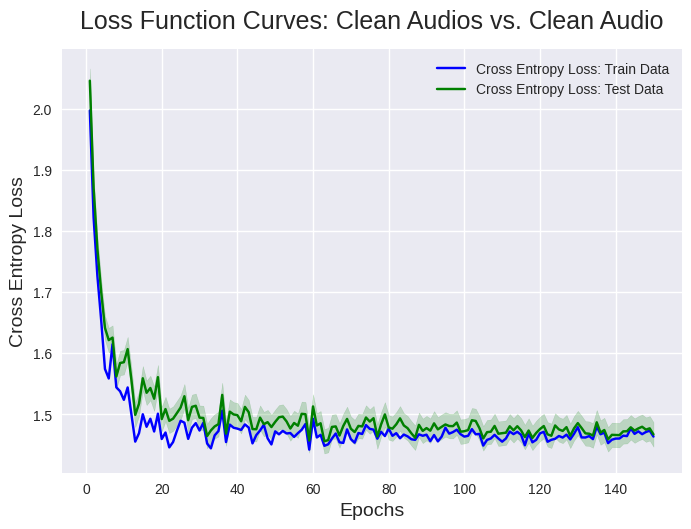

In [4]:
plot_curves('Epochs', 'Cross Entropy Loss', 'Loss Function Curves: Clean Audios vs. Clean Audio', 'Cross Entropy Loss: Train Data', 'Cross Entropy Loss: Test Data', LOSS_TRAIN_DATALOADER, LOSS_VAL_DATALOADER_C, 'blue', 'green', 0.02)

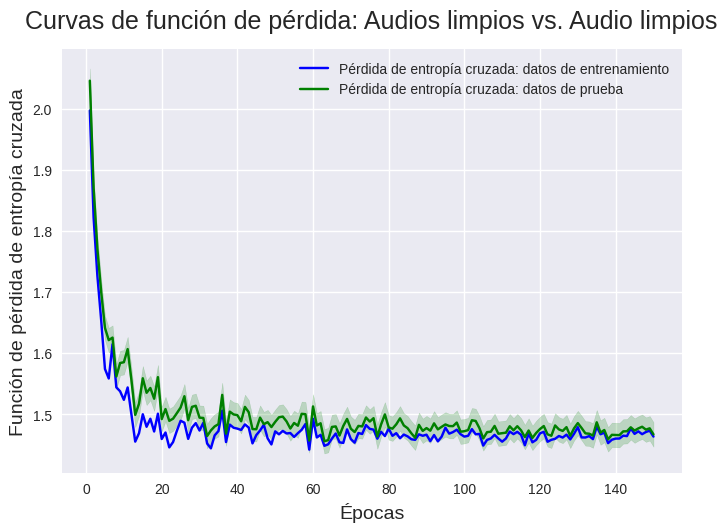

In [5]:
plot_curves('Épocas', 'Función de pérdida de entropía cruzada', 'Curvas de función de pérdida: Audios limpios vs. Audio limpios', 'Pérdida de entropía cruzada: datos de entrenamiento', 'Pérdida de entropía cruzada: datos de prueba', LOSS_TRAIN_DATALOADER, LOSS_VAL_DATALOADER_C, 'blue', 'green', 0.02)

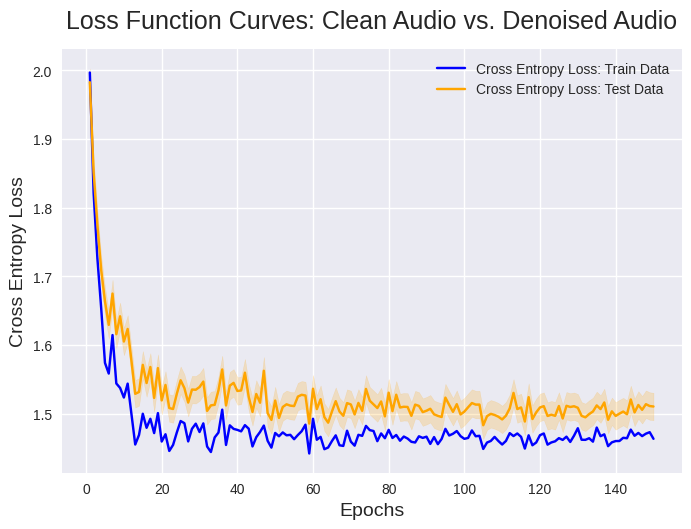

In [6]:
plot_curves('Epochs', 'Cross Entropy Loss', 'Loss Function Curves: Clean Audio vs. Denoised Audio', 'Cross Entropy Loss: Train Data', 'Cross Entropy Loss: Test Data', LOSS_TRAIN_DATALOADER, LOSS_VAL_DATALOADER_D, 'blue', 'orange', 0.02)

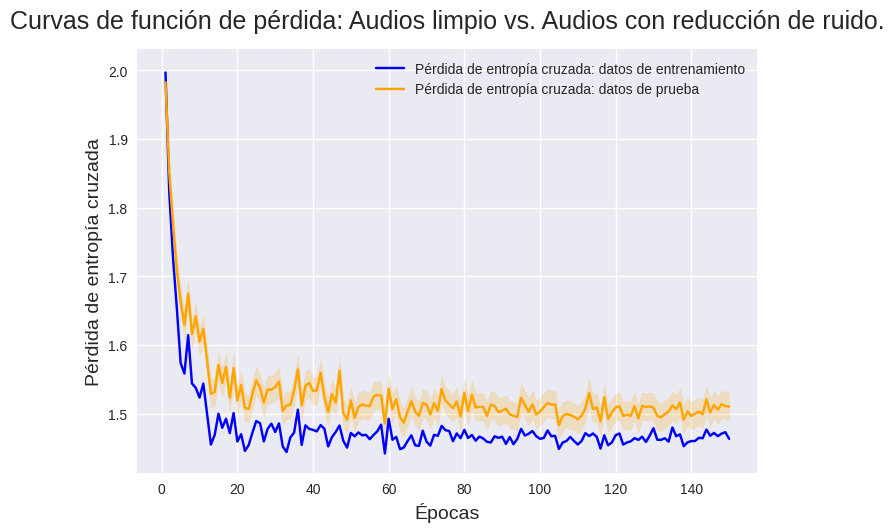

In [7]:
plot_curves('Épocas', 'Pérdida de entropía cruzada', 'Curvas de función de pérdida: Audios limpio vs. Audios con reducción de ruido.', 'Pérdida de entropía cruzada: datos de entrenamiento', 'Pérdida de entropía cruzada: datos de prueba', LOSS_TRAIN_DATALOADER, LOSS_VAL_DATALOADER_D, 'blue', 'orange', 0.02)

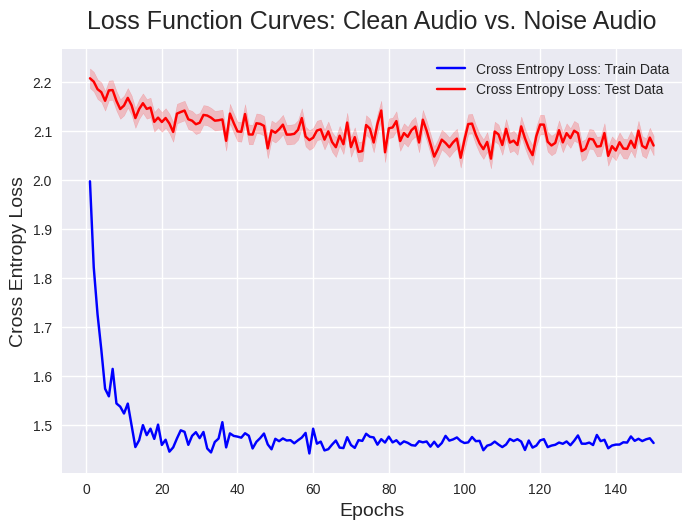

In [8]:
plot_curves('Epochs', 'Cross Entropy Loss', 'Loss Function Curves: Clean Audio vs. Noise Audio', 'Cross Entropy Loss: Train Data', 'Cross Entropy Loss: Test Data', LOSS_TRAIN_DATALOADER, LOSS_VAL_DATALOADER_N, 'blue', 'red', 0.02)

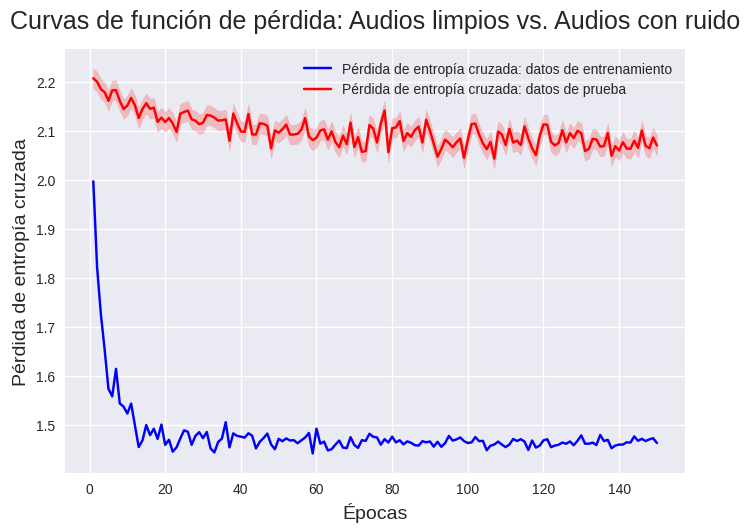

In [9]:
plot_curves('Épocas', 'Pérdida de entropía cruzada', 'Curvas de función de pérdida: Audios limpios vs. Audios con ruido', 'Pérdida de entropía cruzada: datos de entrenamiento', 'Pérdida de entropía cruzada: datos de prueba', LOSS_TRAIN_DATALOADER, LOSS_VAL_DATALOADER_N, 'blue', 'red', 0.02)

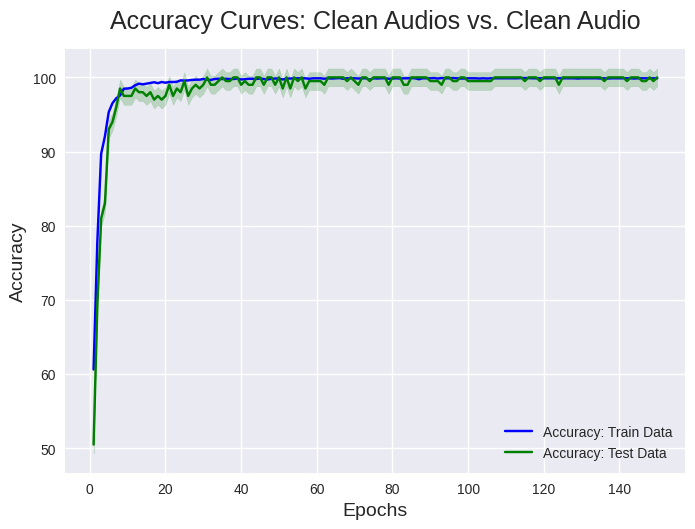

In [10]:
plot_curves('Epochs', 'Accuracy', 'Accuracy Curves: Clean Audios vs. Clean Audio', 'Accuracy: Train Data', 'Accuracy: Test Data', ACC_TRAIN_DATALOADER, ACC_VAL_DATALOADER_C, 'blue', 'green', 1.2)

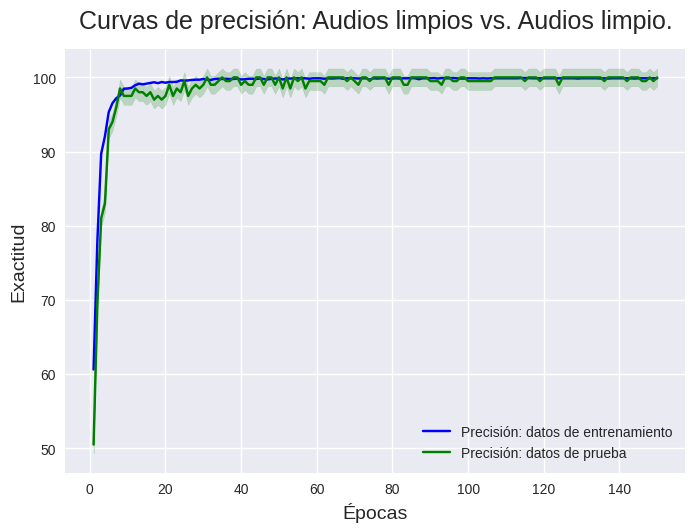

In [11]:
plot_curves('Épocas', 'Exactitud', 'Curvas de precisión: Audios limpios vs. Audios limpio.', 'Precisión: datos de entrenamiento', 'Precisión: datos de prueba', ACC_TRAIN_DATALOADER, ACC_VAL_DATALOADER_C, 'blue', 'green', 1.2)

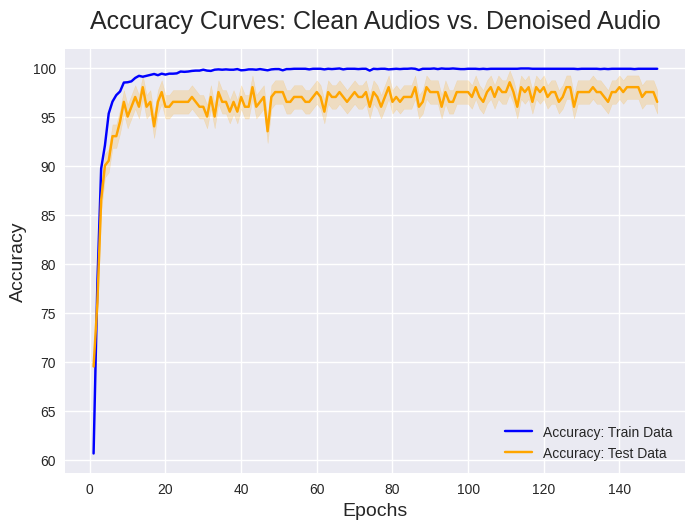

In [12]:
plot_curves('Epochs', 'Accuracy', 'Accuracy Curves: Clean Audios vs. Denoised Audio', 'Accuracy: Train Data', 'Accuracy: Test Data', ACC_TRAIN_DATALOADER, ACC_VAL_DATALOADER_D, 'blue', 'orange', 1.2)

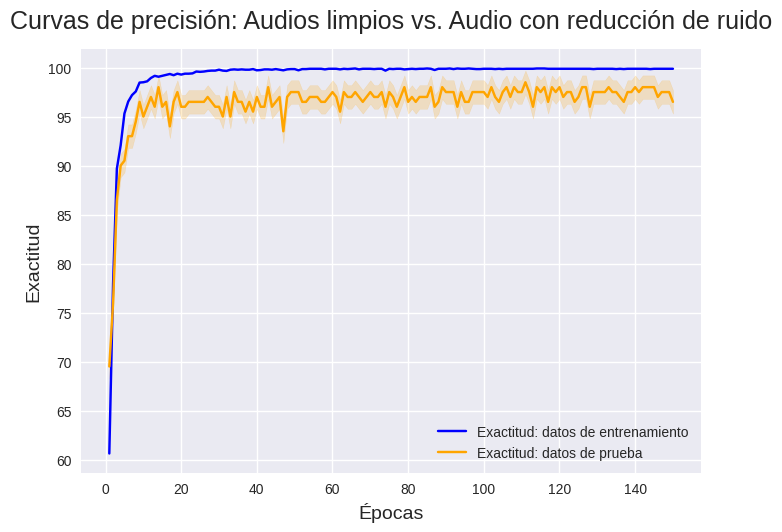

In [13]:
plot_curves('Épocas', 'Exactitud', 'Curvas de precisión: Audios limpios vs. Audio con reducción de ruido', 'Exactitud: datos de entrenamiento', 'Exactitud: datos de prueba', ACC_TRAIN_DATALOADER, ACC_VAL_DATALOADER_D, 'blue', 'orange', 1.2)

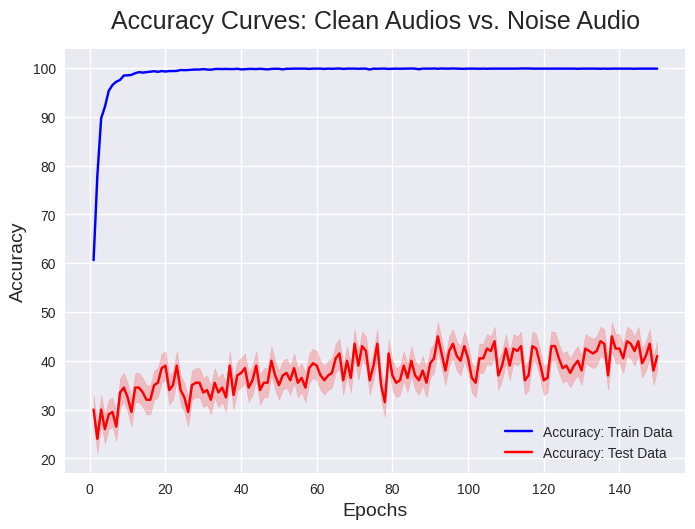

In [14]:
plot_curves('Epochs', 'Accuracy', 'Accuracy Curves: Clean Audios vs. Noise Audio', 'Accuracy: Train Data', 'Accuracy: Test Data', ACC_TRAIN_DATALOADER, ACC_VAL_DATALOADER_N, 'blue', 'red', 3)

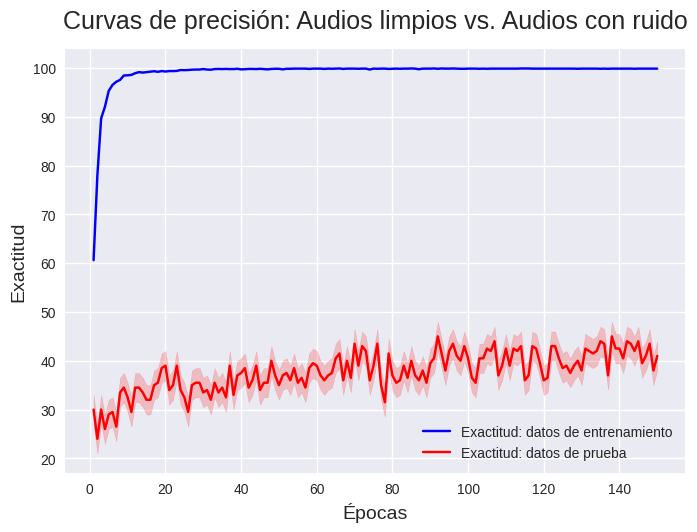

In [15]:
plot_curves('Épocas', 'Exactitud', 'Curvas de precisión: Audios limpios vs. Audios con ruido', 'Exactitud: datos de entrenamiento', 'Exactitud: datos de prueba', ACC_TRAIN_DATALOADER, ACC_VAL_DATALOADER_N, 'blue', 'red', 3)

In [16]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [17]:
class CustomDataset(Dataset):
    def __init__(self, idx, clean_data, noise_data):
        self.idx = idx
        self.clean_data = clean_data
        self.noise_data = noise_data

    def __len__(self):
        return len(self.clean_data)

    def __getitem__(self, index):
        idx = int(self.idx[index])
        clean_data = self.clean_data[index]
        noise_data = self.noise_data[index]
        return idx, clean_data, noise_data

In [18]:
TEST_DATASET_C = torch.load('data/DATASET_MFCC/TEST_SPEAKER_C.pt')
TEST_DATASET_D = torch.load('data/DATASET_MFCC/TEST_SPEAKER_D.pt')

In [19]:
BATCH_SIZE = 8
IS_SUFFLE = True
torch.manual_seed(0)
test_dataloader_c = DataLoader(TEST_DATASET_C, shuffle=IS_SUFFLE)
test_dataloader_d = DataLoader(TEST_DATASET_D, shuffle=IS_SUFFLE)

In [20]:
for i, (idx, clean_data, noise_data) in enumerate(test_dataloader_c):
    print(i)
    print(idx)

0
tensor([3])
1
tensor([0])
2
tensor([7])
3
tensor([4])
4
tensor([8])
5
tensor([4])
6
tensor([8])
7
tensor([1])
8
tensor([9])
9
tensor([1])
10
tensor([7])
11
tensor([1])
12
tensor([2])
13
tensor([5])
14
tensor([8])
15
tensor([3])
16
tensor([2])
17
tensor([9])
18
tensor([1])
19
tensor([1])
20
tensor([1])
21
tensor([7])
22
tensor([3])
23
tensor([6])
24
tensor([2])
25
tensor([3])
26
tensor([2])
27
tensor([6])
28
tensor([2])
29
tensor([0])
30
tensor([8])
31
tensor([0])
32
tensor([7])
33
tensor([4])
34
tensor([8])
35
tensor([8])
36
tensor([0])
37
tensor([6])
38
tensor([6])
39
tensor([3])
40
tensor([2])
41
tensor([2])
42
tensor([3])
43
tensor([8])
44
tensor([8])
45
tensor([7])
46
tensor([8])
47
tensor([8])
48
tensor([0])
49
tensor([9])
50
tensor([0])
51
tensor([2])
52
tensor([0])
53
tensor([9])
54
tensor([8])
55
tensor([0])
56
tensor([9])
57
tensor([9])
58
tensor([0])
59
tensor([8])
60
tensor([5])
61
tensor([6])
62
tensor([9])
63
tensor([2])
64
tensor([0])
65
tensor([6])
66
tensor([1])
67
te

In [21]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device available: {0}'.format(device))

Device available: cuda:0


In [22]:
model = module_nn.VGG16(num_classes=10).to(device)
model.load_state_dict(torch.load('models_classification/C_model_SPEAKER_IDENTIFICATION_FINAL.pt'))
model.eval()

VGG16(
  (layer1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (layer4): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_siz

In [23]:
ytrueBatchC = []
ypredBatchC = []
with torch.no_grad():
    correct = 0
    total = 0
    for i, (labels, clean_data, _) in enumerate(test_dataloader_c):
        labels = labels.to(device)
        clean_data = clean_data.unsqueeze(1).to(device)
        ytrueBatchC.append(labels)
        outputs = model(clean_data)
        #loss_train = hyperparameters['criterion_c'](outputs, labels)
        _, predicted = torch.max(outputs.data, 1)
        ypredBatchC.append(predicted)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        #run_loss_train += loss_train.item()
        del labels, clean_data, outputs       
    print('TRAIN - Accuracy of the network on the {} training MFCCs: {} %'.format(len(test_dataloader_c.dataset), 100 * correct / total))

TRAIN - Accuracy of the network on the 200 training MFCCs: 99.0 %


In [24]:
ytrueBatchN = []
ypredBatchN = []
with torch.no_grad():
    correct = 0
    total = 0
    for i, (labels, _, clean_data) in enumerate(test_dataloader_c):
        labels = labels.to(device)
        clean_data = clean_data.unsqueeze(1).to(device)
        ytrueBatchN.append(labels)
        outputs = model(clean_data)
        #loss_train = hyperparameters['criterion_c'](outputs, labels)
        _, predicted = torch.max(outputs.data, 1)
        ypredBatchN.append(predicted)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        #run_loss_train += loss_train.item()
        del labels, clean_data, outputs       
    print('TRAIN - Accuracy of the network on the {} training MFCCs: {} %'.format(len(test_dataloader_c.dataset), 100 * correct / total))

TRAIN - Accuracy of the network on the 200 training MFCCs: 32.5 %


In [25]:
ytrueBatchD = []
ypredBatchD = []
PRED_D = []
with torch.no_grad():
    correct = 0
    total = 0
    for i, (labels, clean_data, _) in enumerate(test_dataloader_d):
        labels = labels.to(device)
        clean_data = clean_data.unsqueeze(1).to(device)
        ytrueBatchD.append(labels)
        outputs = model(clean_data)
        PRED_D.append(outputs)
        #loss_train = hyperparameters['criterion_c'](outputs, labels)
        _, predicted = torch.max(outputs.data, 1)
        ypredBatchD.append(predicted)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        #run_loss_train += loss_train.item()
        del labels, clean_data, outputs       
    print('TRAIN - Accuracy of the network on the {} training MFCCs: {} %'.format(len(test_dataloader_c.dataset), 100 * correct / total))

TRAIN - Accuracy of the network on the 200 training MFCCs: 99.5 %


In [26]:
ytrueBatchDN = []
ypredBatchDN = []
with torch.no_grad():
    correct = 0
    total = 0
    for i, (labels, _, clean_data) in enumerate(test_dataloader_d):
        labels = labels.to(device)
        clean_data = clean_data.unsqueeze(1).to(device)
        ytrueBatchDN.append(labels)
        outputs = model(clean_data)
        #print(outputs.size())
        #loss_train = hyperparameters['criterion_c'](outputs, labels)
        _, predicted = torch.max(outputs.data, 1)
        ypredBatchDN.append(predicted)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        #run_loss_train += loss_train.item()
        del labels, clean_data, outputs       
    print('TRAIN - Accuracy of the network on the {} training MFCCs: {} %'.format(len(test_dataloader_c.dataset), 100 * correct / total))

TRAIN - Accuracy of the network on the 200 training MFCCs: 43.5 %


In [27]:
from sklearn.metrics import roc_auc_score

In [28]:
def get_metrics_from_vgg(dsdataset, dtdataloader, ytrueBatch, ypredBatch, classes):
    ytrue = torch.ones(len(dsdataset))
    ypred = torch.ones(len(dsdataset))
    
    cont = 0
    for i in range(len(dtdataloader)):
        for j in range(len(ytrueBatch[i])):
            ytrue[cont] = ytrueBatch[i][j]
            ypred[cont] = ypredBatch[i][j]
            cont+=1
     
    AccuracyM = Accuracy(task='multiclass', num_classes=classes)
    print("Accuracy: "+str(AccuracyM(ytrue, ypred).item()))
    RecallM = Recall(task='multiclass', num_classes=classes)
    print("Recall: "+str(RecallM(ytrue, ypred).item()))
    SpecificityM = Specificity(task='multiclass', num_classes=classes)
    print("Specificity: "+str(SpecificityM(ytrue, ypred).item()))
    F1ScoreM = F1Score(task='multiclass', num_classes=classes)
    print("F1Score: "+str(F1ScoreM(ytrue, ypred).item()))
    ConfusionMatrixM = ConfusionMatrix(task='multiclass', num_classes=classes)
    #, y_true#print(ConfusionMatrixM(ytrue, ypred))
    confusionmatrix = ConfusionMatrixM(ytrue, ypred).numpy()
    return AccuracyM, RecallM, SpecificityM, F1ScoreM, confusionmatrix

In [29]:
def plot_confusion_matrix(confusionmatrix, is_clean, is_not_english):
    classes_cm = [str(x) for x in range(10)]
    disp = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, display_labels=classes_cm)
    if(is_clean):
        disp.plot(cmap=plt.cm.Greens)
    else:
        disp.plot(cmap=plt.cm.Reds)
    if(is_not_english):
        plt.xlabel('Etiqueta predicha')
        plt.ylabel('Etiqueta verdadera')
    plt.show()

In [30]:
AccuracyClean, RecallClean, SpecificityClean, F1ScoreClean, confusionmatrixClean = get_metrics_from_vgg(TEST_DATASET_C, test_dataloader_c, ytrueBatchC, ypredBatchC, 10)

Accuracy: 0.9900000095367432
Recall: 0.9900000095367432
Specificity: 0.9988889098167419
F1Score: 0.9900000095367432


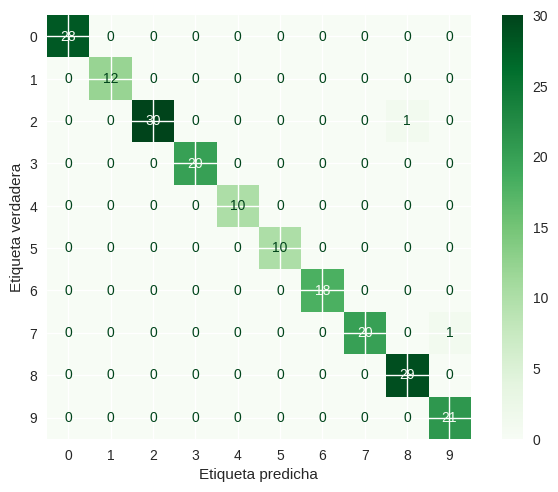

In [31]:
plot_confusion_matrix(confusionmatrixClean, True, True)

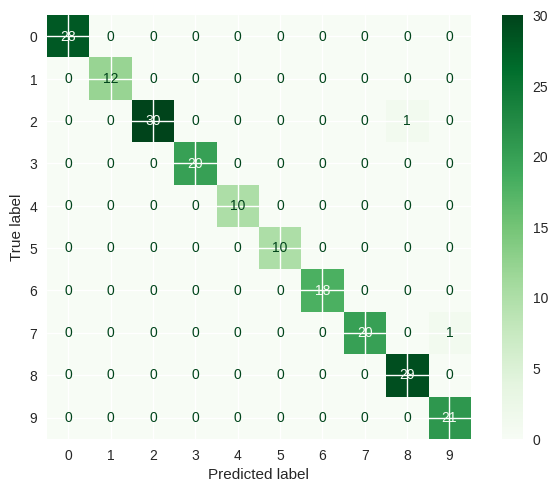

In [32]:
plot_confusion_matrix(confusionmatrixClean, True, False)

In [33]:
AccuracyNoise, RecallNoise, SpecificityNoise, F1ScoreNoise, confusionmatrixNoise = get_metrics_from_vgg(TEST_DATASET_C, test_dataloader_c, ytrueBatchN, ypredBatchN, 10)

Accuracy: 0.32499998807907104
Recall: 0.32499998807907104
Specificity: 0.925000011920929
F1Score: 0.32499998807907104


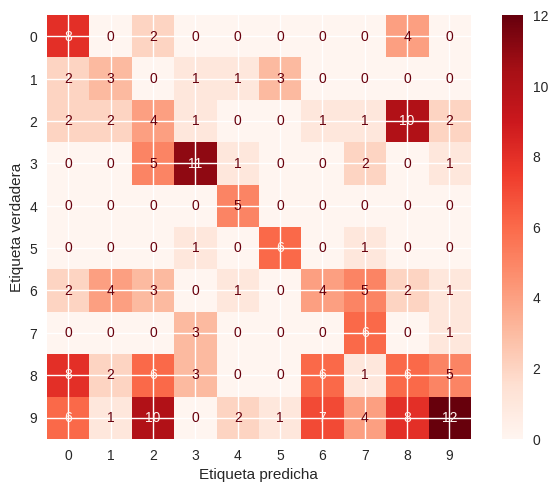

In [34]:
plot_confusion_matrix(confusionmatrixNoise, False, True)

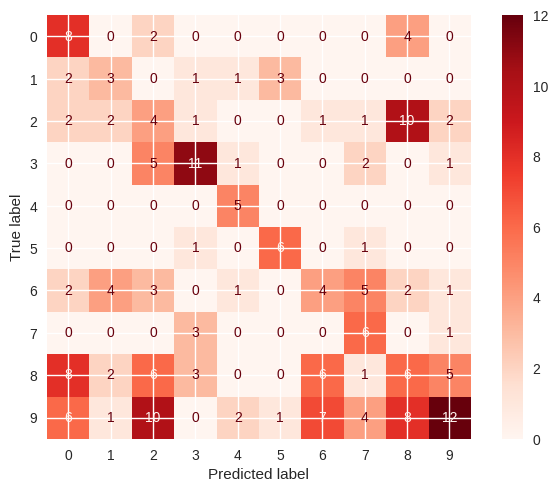

In [35]:
plot_confusion_matrix(confusionmatrixNoise, False, False)

In [36]:
AccuracyDenoised, RecallDenoised, SpecificityDenoised, F1ScoreDenoised, confusionmatrixDenoised = get_metrics_from_vgg(TEST_DATASET_D, test_dataloader_d, ytrueBatchD, ypredBatchD, 10)

Accuracy: 0.9950000047683716
Recall: 0.9950000047683716
Specificity: 0.9994444251060486
F1Score: 0.9950000047683716


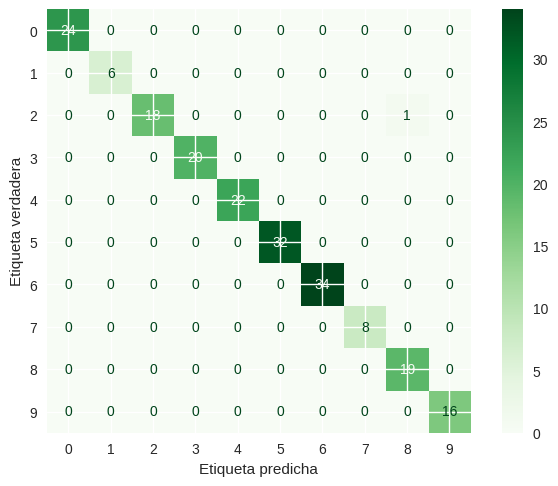

In [37]:
plot_confusion_matrix(confusionmatrixDenoised, True, True)

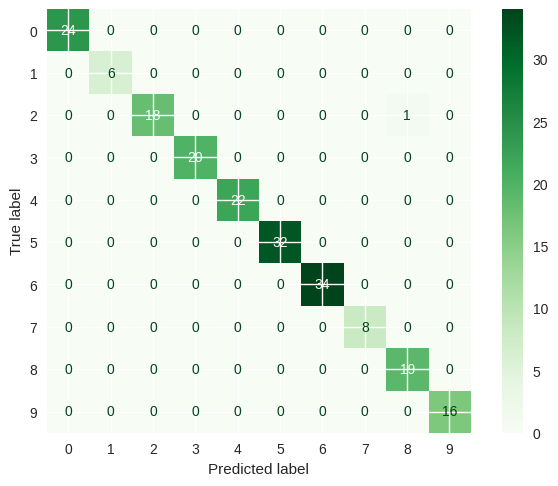

In [38]:
plot_confusion_matrix(confusionmatrixDenoised, True, False)

In [39]:
AccuracyDenoisedN, RecallDenoisedN, SpecificityDenoisedN, F1ScoreDenoisedN, confusionmatrixDenoisedN = get_metrics_from_vgg(TEST_DATASET_D, test_dataloader_d, ytrueBatchDN, ypredBatchDN, 10)

Accuracy: 0.4350000023841858
Recall: 0.4350000023841858
Specificity: 0.9372222423553467
F1Score: 0.4350000023841858


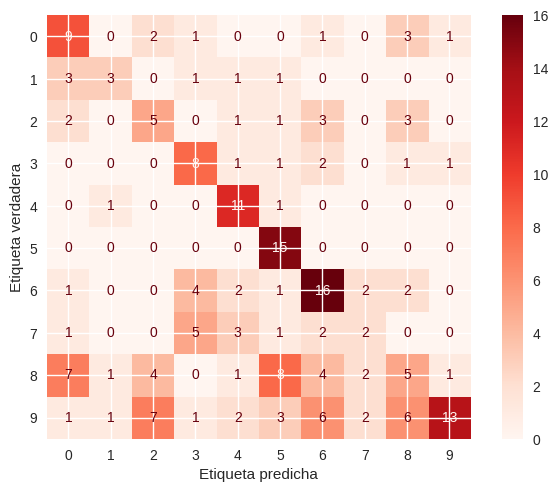

In [40]:
plot_confusion_matrix(confusionmatrixDenoisedN, False, True)

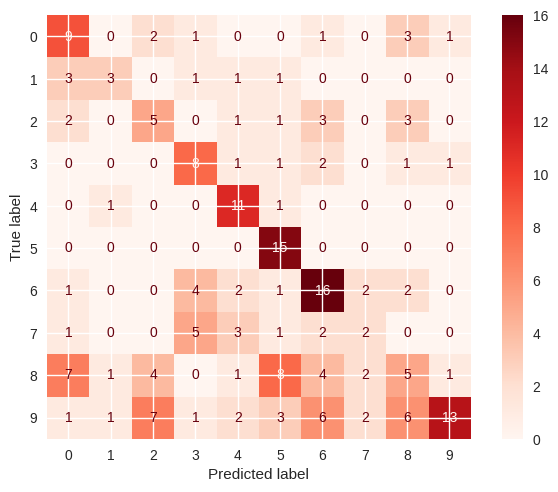

In [41]:
plot_confusion_matrix(confusionmatrixDenoisedN, False, False)